In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import gc
import warnings
import os
import time

from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

#warnings.simplefilter(action='ignore', category=FutureWarning)

print(os.listdir("../Projet+Mise+en+prod+-+home-credit-default-risk"))

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))



['application_test.csv', '.DS_Store', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [2]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total Values', 
                                                                          ascending=False).round(1)
          #  mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
       # '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [3]:
# read the df 
#main_model_df = pd.read_csv("../my_csv_files/df_for_modelling.csv")
#combined_feats_for_models = pd.read_csv("../my_csv_files/combined_feats_for_models1.csv")

In [4]:
#combined_feats_for_models.columns = ['ft_names', 'value_counts']

In [5]:
#ft_names = list(combined_feats_for_models["ft_names"])
#total_names  = ft_names + ['TARGET', 'SK_ID_CURR', 'index']

In [6]:
#ft_selec_main_model = main_model_df[total_names]
#ft_selec_main_model.to_csv("../my_csv_files/ft_selec_main_model.csv")

In [8]:
#print(main_model_df.shape)
#print(ft_selec_main_model.shape)

(356251, 799)
(356251, 55)


In [9]:
ft_selec_main_model = pd.read_csv("../my_csv_files/ft_selec_main_model.csv")

In [10]:
del main_model_df
gc.collect()

0

In [11]:
# Missing values statistics
missing_values = missing_values_table(ft_selec_main_model)
missing_values.to_csv("../my_csv_files/ft_selec_missing_values.csv")
missing_values.head(20)

Your selected dataframe has 56 columns.
There are 37 columns that have missing values.


Missing Values  % of Total Values
TARGET                                            48744               13.7
PREV_AMT_ANNUITY_MEAN                             17878                5.0
PREV_AMT_ANNUITY_MIN                              17878                5.0
PREV_CNT_PAYMENT_MEAN                             17876                5.0
PREV_APP_CREDIT_PERC_MEAN                         17650                5.0
PREV_APP_CREDIT_PERC_MIN                          17650                5.0
PREV_NAME_YIELD_GROUP_low_action_MEAN             17398                4.9
PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN           17398                4.9
PREV_HOUR_APPR_PROCESS_START_MEAN                 17398                4.9
PREV_NAME_TYPE_SUITE_nan_MEAN                     17398                4.9
PREV_NAME_CONTRACT_STATUS_Approved_MEAN           17398                4.9
PREV_DAYS_DECISION_MAX                            17398                4.9
PREV_DAYS_DECISION_MEAN                           17398                4.9
PREV_NAME_YIELD_GROUP_high_MEAN                   17398                4.9
PREV_NAME_CONTRACT_STATUS_Refused_MEAN            17398                4.9
INSTAL_DAYS_ENTRY_PAYMENT_MAX                     16677                4.7
INSTAL_PAYMENT_DIFF_MAX                           16677                4.7
INSTAL_PAYMENT_PERC_MEAN                          16677                4.7
INSTAL_AMT_PAYMENT_MEAN                           16677                4.7
INSTAL_DAYS_ENTRY_PAYMENT_MEAN                    16677                4.7

In [12]:
missing_values.tail(40)

Missing Values  % of Total Values
INSTAL_PAYMENT_DIFF_MAX                  16677                4.7
INSTAL_PAYMENT_PERC_MEAN                 16677                4.7
INSTAL_AMT_PAYMENT_MEAN                  16677                4.7
INSTAL_DAYS_ENTRY_PAYMENT_MEAN           16677                4.7
INSTAL_AMT_PAYMENT_MAX                   16677                4.7
INSTAL_PAYMENT_DIFF_MEAN                 16677                4.7
INSTAL_AMT_PAYMENT_MIN                   16677                4.7
INSTAL_AMT_INSTALMENT_MAX                16668                4.7
INSTAL_PAYMENT_DIFF_SUM                  16668                4.7
INSTAL_AMT_INSTALMENT_SUM                16668                4.7
INSTAL_DBD_SUM                           16668                4.7
INSTAL_DBD_MAX                           16668                4.7
INSTAL_PAYMENT_PERC_SUM                  16668                4.7
INSTAL_AMT_INSTALMENT_MEAN               16668                4.7
INSTAL_AMT_PAYMENT_SUM                   16668                4.7
INSTAL_DBD_MEAN                          16668                4.7
INSTAL_DPD_MEAN                          16668                4.7
INSTAL_DAYS_ENTRY_PAYMENT_SUM            16668                4.7
DEF_30_CNT_SOCIAL_CIRCLE                  1050                0.3
EXT_SOURCE_2                               668                0.2
AMT_GOODS_PRICE                            278                0.1
AMT_ANNUITY                                 36                0.0
PAYMENT_RATE                                36                0.0
ANNUITY_INCOME_PERC                         36                0.0
INCOME_PER_PERSON                            2                0.0
DAYS_LAST_PHONE_CHANGE                       1                0.0
FLAG_DOCUMENT_3                              0                0.0
REGION_RATING_CLIENT_W_CITY                  0                0.0
SK_ID_CURR                                   0                0.0
NAME_FAMILY_STATUS_Married                   0                0.0
Unnamed: 0                                   0                0.0
AMT_INCOME_TOTAL                             0                0.0
REGION_POPULATION_RELATIVE                   0                0.0
DAYS_ID_PUBLISH                              0                0.0
DAYS_BIRTH                                   0                0.0
CODE_GENDER                                  0                0.0
INCOME_CREDIT_PERC                           0                0.0
DAYS_REGISTRATION                            0                0.0
AMT_CREDIT                                   0                0.0
index                                        0                0.0

In [79]:
type(ft_selec_main_model['SK_ID_CURR'][0])

numpy.int64

# Missing Values

In [13]:
ft_selec_main_model.columns

Index(['Unnamed: 0', 'INSTAL_AMT_INSTALMENT_MAX',
       'PREV_NAME_YIELD_GROUP_high_MEAN', 'PREV_APP_CREDIT_PERC_MIN',
       'PREV_NAME_CONTRACT_STATUS_Refused_MEAN', 'PREV_DAYS_DECISION_MEAN',
       'AMT_CREDIT', 'INSTAL_PAYMENT_DIFF_MEAN', 'ANNUITY_INCOME_PERC',
       'AMT_GOODS_PRICE', 'PREV_CNT_PAYMENT_MEAN',
       'INSTAL_DAYS_ENTRY_PAYMENT_MAX', 'PREV_APP_CREDIT_PERC_MEAN',
       'PAYMENT_RATE', 'DAYS_REGISTRATION', 'INCOME_CREDIT_PERC',
       'INSTAL_PAYMENT_DIFF_SUM', 'PREV_NAME_TYPE_SUITE_nan_MEAN',
       'CODE_GENDER', 'INSTAL_DBD_MEAN', 'EXT_SOURCE_2',
       'PREV_HOUR_APPR_PROCESS_START_MEAN', 'INSTAL_AMT_PAYMENT_MEAN',
       'DAYS_BIRTH', 'INSTAL_DAYS_ENTRY_PAYMENT_MEAN',
       'INSTAL_DAYS_ENTRY_PAYMENT_SUM', 'INSTAL_DPD_MEAN',
       'INSTAL_PAYMENT_PERC_MEAN', 'AMT_ANNUITY', 'INSTAL_AMT_PAYMENT_SUM',
       'DAYS_ID_PUBLISH', 'INSTAL_PAYMENT_DIFF_MAX', 'DAYS_LAST_PHONE_CHANGE',
       'INSTAL_DBD_MAX', 'INSTAL_DBD_SUM', 'INSTAL_AMT_INSTALMENT_SUM',
       'PR

In [14]:
df = ft_selec_main_model[ft_selec_main_model['TARGET'].notnull()]
#test_df = main_model_df[main_model_df['TARGET'].isnull()]
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.to_csv("../my_csv_files/ft_selec_missing_values.csv")
missing_values.head(55)

Your selected dataframe has 56 columns.
There are 36 columns that have missing values.


Missing Values  % of Total Values
PREV_AMT_ANNUITY_MEAN                             16871                5.5
PREV_AMT_ANNUITY_MIN                              16871                5.5
PREV_CNT_PAYMENT_MEAN                             16869                5.5
PREV_APP_CREDIT_PERC_MIN                          16681                5.4
PREV_APP_CREDIT_PERC_MEAN                         16681                5.4
PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN           16454                5.4
PREV_HOUR_APPR_PROCESS_START_MEAN                 16454                5.4
PREV_DAYS_DECISION_MAX                            16454                5.4
PREV_NAME_TYPE_SUITE_nan_MEAN                     16454                5.4
PREV_NAME_YIELD_GROUP_low_action_MEAN             16454                5.4
PREV_NAME_CONTRACT_STATUS_Approved_MEAN           16454                5.4
PREV_DAYS_DECISION_MEAN                           16454                5.4
PREV_NAME_CONTRACT_STATUS_Refused_MEAN            16454                5.4
PREV_NAME_YIELD_GROUP_high_MEAN                   16454                5.4
INSTAL_DAYS_ENTRY_PAYMENT_MAX                     15876                5.2
INSTAL_PAYMENT_PERC_MEAN                          15876                5.2
INSTAL_AMT_PAYMENT_MIN                            15876                5.2
INSTAL_PAYMENT_DIFF_MEAN                          15876                5.2
INSTAL_AMT_PAYMENT_MAX                            15876                5.2
INSTAL_PAYMENT_DIFF_MAX                           15876                5.2
INSTAL_AMT_PAYMENT_MEAN                           15876                5.2
INSTAL_DAYS_ENTRY_PAYMENT_MEAN                    15876                5.2
INSTAL_DBD_MAX                                    15868                5.2
INSTAL_DBD_SUM                                    15868                5.2
INSTAL_AMT_PAYMENT_SUM                            15868                5.2
INSTAL_AMT_INSTALMENT_MAX                         15868                5.2
INSTAL_AMT_INSTALMENT_MEAN                        15868                5.2
INSTAL_DPD_MEAN                                   15868                5.2
INSTAL_DAYS_ENTRY_PAYMENT_SUM                     15868                5.2
INSTAL_DBD_MEAN                                   15868                5.2
INSTAL_PAYMENT_DIFF_SUM                           15868                5.2
INSTAL_PAYMENT_PERC_SUM                           15868                5.2
INSTAL_AMT_INSTALMENT_SUM                         15868                5.2
DEF_30_CNT_SOCIAL_CIRCLE                           1021                0.3
EXT_SOURCE_2                                        660                0.2
AMT_GOODS_PRICE                                     278                0.1
AMT_ANNUITY                                          12                0.0
PAYMENT_RATE                                         12                0.0
ANNUITY_INCOME_PERC                                  12                0.0
INCOME_PER_PERSON                                     2                0.0
DAYS_LAST_PHONE_CHANGE                                1                0.0
FLAG_DOCUMENT_3                                       0                0.0
REGION_RATING_CLIENT_W_CITY                           0                0.0
TARGET                                                0                0.0
SK_ID_CURR                                            0                0.0
NAME_FAMILY_STATUS_Married                            0                0.0
Unnamed: 0                                            0                0.0
AMT_INCOME_TOTAL                                      0                0.0
REGION_POPULATION_RELATIVE                            0                0.0
DAYS_ID_PUBLISH                                       0                0.0
DAYS_BIRTH                                            0                0.0
CODE_GENDER                                           0                0.0
INCOME_CREDIT_PERC                                    0           

In [15]:
df.sort_values(by = "DAYS_LAST_PHONE_CHANGE")\
        .to_csv("../my_csv_files/ft_selec_sorted_dayslastphonechange.csv")

In [16]:
df = df[df['DAYS_LAST_PHONE_CHANGE'].notnull()]
df = df[df['INCOME_PER_PERSON'].notnull()]
df = df[df['ANNUITY_INCOME_PERC'].notnull()]
df = df[df['AMT_ANNUITY'].notnull()]
df = df[df['AMT_GOODS_PRICE'].notnull()]
df = df[df['EXT_SOURCE_2'].notnull()]
df = df[df['DEF_30_CNT_SOCIAL_CIRCLE'].notnull()]

In [17]:
missing_values_table(df).head(45)

Your selected dataframe has 56 columns.
There are 33 columns that have missing values.


Missing Values  % of Total Values
PREV_AMT_ANNUITY_MIN                              16535                5.4
PREV_AMT_ANNUITY_MEAN                             16535                5.4
PREV_CNT_PAYMENT_MEAN                             16533                5.4
PREV_APP_CREDIT_PERC_MIN                          16345                5.3
PREV_APP_CREDIT_PERC_MEAN                         16345                5.3
PREV_NAME_CONTRACT_STATUS_Approved_MEAN           16118                5.3
PREV_HOUR_APPR_PROCESS_START_MEAN                 16118                5.3
PREV_NAME_YIELD_GROUP_low_action_MEAN             16118                5.3
PREV_NAME_TYPE_SUITE_nan_MEAN                     16118                5.3
PREV_DAYS_DECISION_MAX                            16118                5.3
PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN           16118                5.3
PREV_NAME_YIELD_GROUP_high_MEAN                   16118                5.3
PREV_DAYS_DECISION_MEAN                           16118                5.3
PREV_NAME_CONTRACT_STATUS_Refused_MEAN            16118                5.3
INSTAL_AMT_PAYMENT_MIN                            15540                5.1
INSTAL_AMT_PAYMENT_MAX                            15540                5.1
INSTAL_DAYS_ENTRY_PAYMENT_MEAN                    15540                5.1
INSTAL_PAYMENT_DIFF_MAX                           15540                5.1
INSTAL_AMT_PAYMENT_MEAN                           15540                5.1
INSTAL_PAYMENT_PERC_MEAN                          15540                5.1
INSTAL_DAYS_ENTRY_PAYMENT_MAX                     15540                5.1
INSTAL_PAYMENT_DIFF_MEAN                          15540                5.1
INSTAL_DBD_SUM                                    15532                5.1
INSTAL_AMT_INSTALMENT_SUM                         15532                5.1
INSTAL_AMT_INSTALMENT_MAX                         15532                5.1
INSTAL_AMT_INSTALMENT_MEAN                        15532                5.1
INSTAL_AMT_PAYMENT_SUM                            15532                5.1
INSTAL_DBD_MAX                                    15532                5.1
INSTAL_PAYMENT_PERC_SUM                           15532                5.1
INSTAL_DPD_MEAN                                   15532                5.1
INSTAL_DAYS_ENTRY_PAYMENT_SUM                     15532                5.1
INSTAL_DBD_MEAN                                   15532                5.1
INSTAL_PAYMENT_DIFF_SUM                           15532                5.1
DEF_30_CNT_SOCIAL_CIRCLE                              0                0.0
AMT_INCOME_TOTAL                                      0                0.0
FLAG_DOCUMENT_3                                       0                0.0
NAME_FAMILY_STATUS_Married                            0                0.0
REGION_RATING_CLIENT_W_CITY                           0                0.0
TARGET                                                0                0.0
SK_ID_CURR                                            0                0.0
Unnamed: 0                                            0                0.0
AMT_ANNUITY                                           0                0.0
REGION_POPULATION_RELATIVE                            0                0.0
INCOME_PER_PERSON                                     0                0.0
DAYS_LAST_PHONE_CHANGE                                0                0.0

In [49]:
df["TARGET"].value_counts()

0.0    282682
1.0     24825
Name: TARGET, dtype: int64

In [51]:
df.shape

(307507, 55)

## Missing values: Version for Undersampling

In [134]:
df_ft_selec_dropna = df.dropna()
df_ft_selec_dropna.shape

(288300, 56)

In [135]:
df_ft_selec_dropna = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df_ft_selec_dropna.shape

(288282, 56)

In [136]:
#df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
#df[~df.isin([np.nan, np.inf, -np.inf]).any(0)]
   #(1)]
df[~df.isin([np.nan]).any(1)]

Unnamed: 0  INSTAL_AMT_INSTALMENT_MAX  \
0                0                  53093.745   
1                1                 560835.360   
2                2                  10573.965   
3                3                 691786.890   
4                4                  22678.785   
...            ...                        ...   
307502      307502                  12815.010   
307503      307503                  10074.465   
307504      307504                   5575.185   
307505      307505                  19065.825   
307506      307506                 615229.515   

        PREV_NAME_YIELD_GROUP_high_MEAN  PREV_APP_CREDIT_PERC_MIN  \
0                              0.000000                  1.000000   
1                              0.000000                  0.868825   
2                              0.000000                  1.207699   
3                              0.222222                  0.759418   
4                              0.500000                  0.791139   
...                                 ...                       ...   
307502                         1.000000                  1.000000   
307503                         0.000000                  1.013622   
307504                         1.000000                  1.058833   
307505                         0.500000                  0.878356   
307506                         0.250000                  0.716332   

        PREV_NAME_CONTRACT_STATUS_Refused_MEAN  PREV_DAYS_DECISION_MEAN  \
0                                     0.000000              -606.000000   
1                                     0.000000             -1305.000000   
2                                     0.000000              -815.000000   
3                                     0.111111              -272.444444   
4                                     0.000000             -1222.833333   
...                                        ...                      ...   
307502                                0.000000              -273.000000   
307503                                0.000000             -2497.000000   
307504                                0.000000             -2380.000000   
307505                                0.000000              -299.500000   
307506                                0.250000              -587.625000   

        AMT_CREDIT  INSTAL_PAYMENT_DIFF_MEAN  ANNUITY_INCOME_PERC  \
0         406597.5                  0.000000             0.121978   
1        1293502.5                  0.000000             0.132217   
2         135000.0                  0.000000             0.100000   
3         312682.5                  0.000000             0.219900   
4         513000.0                452.384318             0.179963   
...            ...                       ...                  ...   
307502    254700.0                  0.000000             0.174971   
307503    269550.0                  0.000000             0.166687   
307504    677664.0                283.792500             0.195941   
307505    370107.0                  0.000000             0.118158   
307506    675000.0              -6181.502230             0.311857   

        AMT_GOODS_PRICE  ...  DEF_30_CNT_SOCIAL_CIRCLE  \
0              351000.0  ...                       2.0   
1             1129500.0  ...                       0.0   
2              135000.0  ...                       0.0   
3              297000.0  ...                       0.0   
4              513000.0  ...                       0.0   
...                 ...  ...                       ...   
307502         225000.0  ...                       0.0   
307503         225000.0  ...                       0.0   
307504         585000.0  ...                       0.0   
307505         319500.0  ...                       0.0   
307506         675000.0  ...                       0.0   

        PREV_NAME_CONTRACT_STATUS_Approved_MEAN  \
0                                      1.000000   
1                                      1.000000   
2         

In [137]:
df_ft_selec_dropna["TARGET"].value_counts()

0.0    264633
1.0     23649
Name: TARGET, dtype: int64

In [138]:
sum(df_ft_selec_dropna["TARGET"] == 1.0)

23649

In [139]:
#list(df_ft_selec_dropna.TARGET[df_ft_selec_dropna["TARGET"] == 0.0].index)

In [140]:
np.random.choice(df_ft_selec_dropna.TARGET[df_ft_selec_dropna["TARGET"] == 0.0],
                 40000, replace=False)

array([0., 0., 0., ..., 0., 0., 0.])

In [141]:
sample_size = sum(df_ft_selec_dropna["TARGET"] == 1.0)  # Equivalent to len(data[data.Healthy == 0])
random_indices = np.random.choice(list(df_ft_selec_dropna.TARGET[df_ft_selec_dropna["TARGET"] == 0.0].index),
                 24000, replace=False)

In [142]:
len(random_indices)

24000

In [143]:
23649*2

47298

In [144]:
#list(random_indices)

In [145]:
df_ft_selec_underbal = pd.concat([df_ft_selec_dropna.loc[list(random_indices)], 
                                  df_ft_selec_dropna[df_ft_selec_dropna["TARGET"] == 1.0]])

## Missing values: Version for Oversampling (SMOTE)

In [71]:
# PREV_APP_CREDIT_PERC_MEAN  INSTAL_PAYMENT_PERC_MEAN INSTAL_PAYMENT_PERC_SUM
df_feat_selec_smote = df[~df.isin([np.inf, -np.inf]).any(1)]

In [74]:
df_feat_selec_smote = df_feat_selec_smote.fillna(df_feat_selec_smote.mean()

In [ ]:
print(df_feat_selec_smote.shape)

In [75]:
missing_values_smote = missing_values_table(df_feat_selec_smote)
missing_values_smote.head(55)

Your selected dataframe has 55 columns.
There are 0 columns that have missing values.


Missing Values  % of Total Values
INSTAL_AMT_INSTALMENT_MAX                             0                0.0
AMT_INCOME_TOTAL                                      0                0.0
INSTAL_PAYMENT_DIFF_MAX                               0                0.0
DAYS_LAST_PHONE_CHANGE                                0                0.0
INSTAL_DBD_MAX                                        0                0.0
INSTAL_DBD_SUM                                        0                0.0
INSTAL_AMT_INSTALMENT_SUM                             0                0.0
PREV_DAYS_DECISION_MAX                                0                0.0
PREV_AMT_ANNUITY_MIN                                  0                0.0
PREV_AMT_ANNUITY_MEAN                                 0                0.0
PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN               0                0.0
INCOME_PER_PERSON                                     0                0.0
REGION_POPULATION_RELATIVE                            0                0.0
INSTAL_PAYMENT_PERC_SUM                               0                0.0
INSTAL_AMT_PAYMENT_SUM                                0                0.0
INSTAL_AMT_PAYMENT_MAX                                0                0.0
INSTAL_AMT_INSTALMENT_MEAN                            0                0.0
DEF_30_CNT_SOCIAL_CIRCLE                              0                0.0
PREV_NAME_CONTRACT_STATUS_Approved_MEAN               0                0.0
PREV_NAME_YIELD_GROUP_low_action_MEAN                 0                0.0
FLAG_DOCUMENT_3                                       0                0.0
NAME_FAMILY_STATUS_Married                            0                0.0
REGION_RATING_CLIENT_W_CITY                           0                0.0
INSTAL_AMT_PAYMENT_MIN                                0                0.0
TARGET                                                0                0.0
SK_ID_CURR                                            0                0.0
DAYS_ID_PUBLISH                                       0                0.0
AMT_ANNUITY                                           0                0.0
PREV_NAME_YIELD_GROUP_high_MEAN                       0                0.0
DAYS_REGISTRATION                                     0                0.0
PREV_APP_CREDIT_PERC_MIN                              0                0.0
PREV_NAME_CONTRACT_STATUS_Refused_MEAN                0                0.0
PREV_DAYS_DECISION_MEAN                               0                0.0
AMT_CREDIT                                            0                0.0
INSTAL_PAYMENT_DIFF_MEAN                              0                0.0
ANNUITY_INCOME_PERC                                   0                0.0
AMT_GOODS_PRICE                                       0                0.0
PREV_CNT_PAYMENT_MEAN                                 0                0.0
INSTAL_DAYS_ENTRY_PAYMENT_MAX                         0                0.0
PREV_APP_CREDIT_PERC_MEAN                             0                0.0
PAYMENT_RATE                                          0                0.0
INCOME_CREDIT_PERC                                    0                0.0
INSTAL_PAYMENT_PERC_MEAN                              0                0.0
INSTAL_PAYMENT_DIFF_SUM                               0                0.0
PREV_NAME_TYPE_SUITE_nan_MEAN                         0                0.0
CODE_GENDER                                           0                0.0
INSTAL_DBD_MEAN                                       0                0.0
EXT_SOURCE_2                                          0                0.0
PREV_HOUR_APPR_PROCESS_START_MEAN                     0                0.0
INSTAL_AMT_PAYMENT_MEAN                               0                0.0
DAYS_BIRTH                                            0                0.0
INSTAL_DAYS_ENTRY_PAYMENT_MEAN                        0                0.0
INSTAL_DAYS_ENTRY_PAYMENT_SUM                         0           

In [76]:
import re

# Divide in training/validation and test data
df_feat_selec_smote = df_feat_selec_smote.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

train_df = df_feat_selec_smote[df_feat_selec_smote['TARGET'].notnull()]
test_df = df_feat_selec_smote[df_feat_selec_smote['TARGET'].isnull()]


# Cross validation model
#if stratified:
#    folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
#else:
#    folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    
# Create arrays and dataframes to store results
feats = [f for f in train_df.columns if f not in ['TARGET', 'Unnamed: 0', 'Unnamed0',
                                                  'SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

# Sklearn stuff
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load and split dataset
#x_train, x_test, y_train, y_test = train_test_split(train_df[feats], train_df['TARGET'], 
 #                                                   test_size=0.3, random_state = 22)




In [80]:
len(train_df['TARGET'])

307488

In [81]:
train_df['TARGET'].value_counts()

0.0    282665
1.0     24823
Name: TARGET, dtype: int64

In [79]:
train_df[feats].shape

(307488, 52)

In [82]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 24)

X_sm, y_sm = sm.fit_resample(train_df[feats], train_df['TARGET'])

print(f'''Shape of X before SMOTE: {train_df[feats].shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (307488, 52)
Shape of X after SMOTE: (565330, 52)

Balance of positive and negative classes (%):


1.0    50.0
0.0    50.0
Name: TARGET, dtype: float64

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, 
                                                    test_size=0.3, random_state = 22)

In [94]:
# concat the smote version back together for later models
X_sm.shape

(565330, 52)

In [95]:
len(y_sm)

565330

In [101]:
df_smote_version = pd.concat([X_sm, y_sm], axis = 1)

# Modelling Start

## Create my own cost function and divide into test / train

In [146]:
import re

df_ft_selec = df_ft_selec_underbal
# Divide in training/validation and test data
df_ft_selec = df_ft_selec.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

train_df = df_ft_selec[df_ft_selec['TARGET'].notnull()]
test_df = df_ft_selec[df_ft_selec['TARGET'].isnull()]


# Cross validation model
#if stratified:
#    folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
#else:
#    folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    
# Create arrays and dataframes to store results
feats = [f for f in train_df.columns if f not in ['TARGET', 'Unnamed: 0', 'Unnamed0',
                                                  'SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV',
                                                  'index']]

# Sklearn stuff
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load and split dataset
#x, y = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(train_df[feats], train_df['TARGET'], 
                                                    test_size=0.3, random_state = 22)

In [147]:
del test_df
gc.collect()

712

## Hyperparameter Search: from hyperopt

In [148]:
from sklearn.metrics import confusion_matrix
import numpy as np

def my_comp_score(y_true, y_pred):

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    tn_weight = 1
    fp_weight = 0
    fn_weight = -10
    tp_weight = 0

    # gain function for company, true positives and false positives don't matter that much to us
    # we want to penalise the false negatives, and we want to say yes to true negatives
    gain = tp*(tp_weight) + tn*(tn_weight) + fp*(fp_weight) + fn*(fn_weight)
    
    # best represents scenario where there are no false negatives or false postives
    # so all false positives would be correctly shown as negative
    # and all false negatives would be correctly show as positive
    best = (tn + fp) * tn_weight + (tp + fn) * tp_weight
    
    # baseline is a naive model that predicts non default(negative) for everyone
    # but all true positives and false negatives would be incorrectly shown as negative
    baseline = (tn + fp) * tn_weight + (tp + fn) * fn_weight
    
    score = (gain - baseline) / (best - baseline)
    
    return score



def my_comp_score_probs(y_true, y_pred):
    
    # for now y_pred is the probability that the value is 1
    y_use = [1 if i >= 0.5 else 0 for i in y_pred]
    
    y_use = pd.Series(y_use)

    tn, fp, fn, tp = confusion_matrix(y_true, y_use).ravel()
    
    tn_weight = 1
    fp_weight = 0
    fn_weight = -10
    tp_weight = 0

    # gain function for company, true positives and false positives don't matter that much to us
    # we want to penalise the false negatives, and we want to say yes to true negatives
    gain = tp*(tp_weight) + tn*(tn_weight) + fp*(fp_weight) + fn*(fn_weight)
    
    # best represents scenario where there are no false negatives or false postives
    # so all false positives would be correctly shown as negative
    # and all false negatives would be correctly show as positive
    best = (tn + fp) * tn_weight + (tp + fn) * tp_weight
    
    # baseline is a naive model that predicts non default(negative) for everyone
    # so all true positives and false negatives would be incorrectly shown as negative
    baseline = (tn + fp) * tn_weight + (tp + fn) * fn_weight
    
    score = ((gain - baseline) / (best - baseline))

    return score

In [149]:
from sklearn.metrics import fbeta_score, make_scorer
make_scorer(my_comp_score)

make_scorer(my_comp_score)

In [150]:
from hyperopt import fmin, tpe, hp, anneal, Trials

# HyperOpt: Optimizer
from hyperopt import tpe

kf = KFold(n_splits = 5)

In [151]:
# make sure we have the right dataset


In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def gb_mse_cv(params, random_state = 22, cv = kf, X = x_train, y= y_train):
    # the function gets a set of variable parameters in "param"
    params = {'learning_rate': params['learning_rate'],
              'num_leaves': int(params['num_leaves']),
              'subsample' : params['subsample'],
              'max_depth': int(params['max_depth']),
              'reg_alpha' : params['reg_alpha'],
              'reg_lambda' : params['reg_lambda'],
              'min_child_weight': int(params['min_child_weight']),
              'min_data_in_leaf': int(params['min_data_in_leaf']),
              'min_split_gain' :  params['min_split_gain']
              }
    #              'min_data_in_leaf': int(params['min_data_in_leaf']),
    
    # we use this params to create a new LGBM Regressor
    model = LGBMClassifier(random_state = random_state, **params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, 
                             scoring= make_scorer(my_comp_score_probs, 
                                                                      needs_proba= True), 
                             n_jobs=-1).mean()

    return score


In [153]:
%%time

n_iter = 50

# possible values of parameters
space = {'learning_rate': hp.loguniform('learning_rate', -5, 0),
         'num_leaves' : hp.quniform('num_leaves', 2, 40, 1),
         'subsample' : hp.loguniform('subsample', -4, 0),
         'max_depth' : hp.quniform('max_depth', 2, 14, 1),
         'reg_alpha' : hp.loguniform('reg_alpha', -4, 0),
         'reg_lambda' : hp.loguniform('reg_lambda', -4, 0),
         'min_child_weight': hp.quniform('min_child_weight', 2, 40, 1),
         'min_data_in_leaf': hp.quniform('min_data_in_leaf', 2, 40, 1),
         'min_split_gain' : hp.loguniform('min_split_gain', -4, 0)
        }

# trials will contain logging information
trials = Trials()

best=fmin(fn=gb_mse_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.RandomState(58) # fixing random state for the reproducibility
         )

# computing the score on the test set
model = LGBMClassifier(random_state = 54,
                       learning_rate = best['learning_rate'],
                       num_leaves = int(best['num_leaves']), 
                       subsample = best['subsample'],
                       max_depth = int(best['max_depth']),
                       reg_alpha = best['reg_alpha'],
                       reg_lambda = best['reg_lambda'],
                       min_child_weight = int(best['min_child_weight']),
                       min_data_in_leaf = int(best['min_data_in_leaf']),
                       min_split_gain = best['min_split_gain']
                       )

model.fit(x_train, y_train)

print("Best  {:.3f} params {}".format( gb_mse_cv(best), best))


100%|██████████| 50/50 [01:06<00:00,  1.34s/trial, best loss: -0.6459110699323697]
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
Best  -0.646 params {'learning_rate': 0.10410485804309211, 'max_depth': 9.0, 'min_child_weight': 38.0, 'min_data_in_leaf': 16.0, 'min_split_gain': 0.7643255875000656, 'num_leaves': 16.0, 'reg_alpha': 0.044491576885502565, 'reg_lambda': 0.6078274796789973, 'subsample': 0.03471194618415732}
CPU times: user 4.86 s, sys: 962 ms, total: 5.82 s
Wall time: 1min 8s


In [154]:
print("Best  {:.3f} params {}".format( gb_mse_cv(best), best))

Best  -0.646 params {'learning_rate': 0.10410485804309211, 'max_depth': 9.0, 'min_child_weight': 38.0, 'min_data_in_leaf': 16.0, 'min_split_gain': 0.7643255875000656, 'num_leaves': 16.0, 'reg_alpha': 0.044491576885502565, 'reg_lambda': 0.6078274796789973, 'subsample': 0.03471194618415732}


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

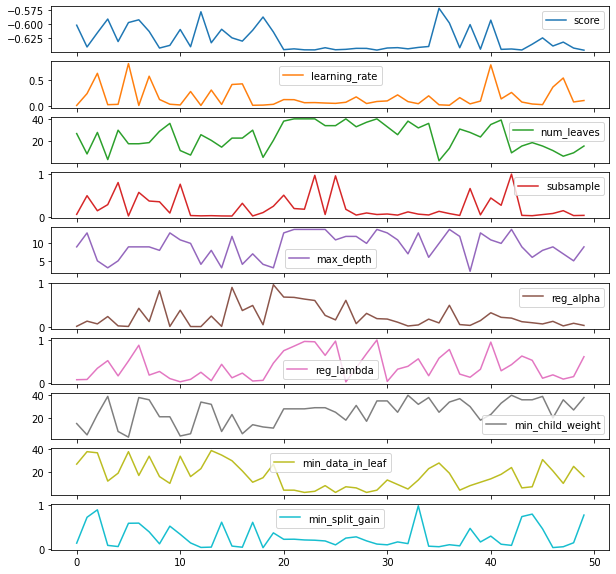

In [155]:
#tpe_test_score=mean_squared_error(x_test, model.predict(y_test))

tpe_results = np.array([[x['result']['loss'],
                         x['misc']['vals']['learning_rate'][0],
                         x['misc']['vals']['num_leaves'][0],
                         x['misc']['vals']['subsample'][0],
                         x['misc']['vals']['max_depth'][0],
                         x['misc']['vals']['reg_alpha'][0],
                         x['misc']['vals']['reg_lambda'][0],
                         x['misc']['vals']['min_child_weight'][0],
                         x['misc']['vals']['min_data_in_leaf'][0],
                         x['misc']['vals']['min_split_gain'][0]] for x in trials.trials])

tpe_results_df = pd.DataFrame(tpe_results,
                           columns=['score', 
                                    'learning_rate', 
                                    'num_leaves',
                                    'subsample',
                                    'max_depth',
                                    'reg_alpha',
                                    'reg_lambda',
                                    'min_child_weight',
                                    'min_data_in_leaf',
                                    'min_split_gain'])
                                    
tpe_results_df.plot(subplots=True,figsize=(10, 10))

In [ ]:
model

In [31]:
import pickle
import joblib

#+ "/classification/models/"
#model, vectorizer_model = train_test_model(data["text"], data["category"])
joblib.dump(model, "../Models/hyperpar_search_lgbm_thresh03model.sav")
#joblib.dump(vectorizer_model, model_path+"vectorizer.sav")
print ("====done saving into pickle using Joblib!====")

pickle.dump(model, open("../Models/hyperpar_search_lgbm_thresh03model.pickle", 'wb'))
#pickle.dump(vectorizer_model, open(model_path+"vectorizer.pickle", "wb"))
print ("====done saving into pickle using Pickle!====")

====done saving into pickle using Joblib!====
====done saving into pickle using Pickle!====


In [ ]:
def loading_pickle(model_path):
    #vectorizer = pickle.load(open(model_path+"vectorizer.pickle",'rb'))
    model = pickle.load(open(model_path+"model.pickle",'rb'))
    return model
    #return vectorizer, model


def loading_joblibPickle(model_path):
    #vectorizer = joblib.load(model_path+"vectorizer.sav")
    model = joblib.load(model_path+"model.sav")
    return model 
    #return vectorizer, model

In [ ]:
loading_pickle(model_path)

## Launching the model

In [156]:
from sklearn.metrics import confusion_matrix
import numpy as np

def my_comp_score_lgbm(y_true, y_pred):
    
    # for now y_pred is the probability that the value is 1
    y_use = [1 if i >= 0.5 else 0 for i in y_pred]
    
    y_use = pd.Series(y_use)

    tn, fp, fn, tp = confusion_matrix(y_true, y_use).ravel()
    
    tn_weight = 1
    fp_weight = 0
    fn_weight = -10
    tp_weight = 0

    # gain function for company, true positives and false positives don't matter that much to us
    # we want to penalise the false negatives, and we want to say yes to true negatives
    gain = tp*(tp_weight) + tn*(tn_weight) + fp*(fp_weight) + fn*(fn_weight)
    
    # best represents scenario where there are no false negatives or false postives
    # so all false positives would be correctly shown as negative
    # and all false negatives would be correctly show as positive
    best = (tn + fp) * tn_weight + (tp + fn) * tp_weight
    
    # baseline is a naive model that predicts non default(negative) for everyone
    # but all true positives and false negatives would be incorrectly shown as negative
    baseline = (tn + fp) * tn_weight + (tp + fn) * fn_weight
    
    score = ((gain - baseline) / (best - baseline))

    return 'my score', score, True

In [157]:
# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('../lgbm_importances02.png')

In [158]:
#main_model_df


In [159]:
import re

num_folds= 10
stratified= False
#debug= debug

df_lgbm = df_ft_selec_underbal

# Divide in training/validation and test data
df_lgbm = df_lgbm.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

train_df = df_lgbm[df_lgbm['TARGET'].notnull()]
test_df = df_lgbm[df_lgbm['TARGET'].isnull()]

#print("Starting LightGBM. Train shape: {}, test shape: {}".format(trainlgbm_df.shape, 
#                                                                  testlgbm_df.shape))
#del main_model_df
#gc.collect()

# Cross validation model
if stratified:
    folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
else:
    folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    
# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
#sub_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()

# Create arrays and dataframes to store results
feats = [f for f in train_df.columns if f not in ['TARGET', 'Unnamed: 0', 'Unnamed0',
                                                  'SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]


In [161]:
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], 
                                                            train_df['TARGET'])):
    train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
    valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]
    
    train_x.to_csv("../my_csv_files/MY_train_x.csv")
    valid_x.to_csv("../my_csv_files/MY_valid_x.csv")
    valid_y.to_csv("../my_csv_files/MY_valid_y.csv")

    ##LightGBM parameters found by Bayesian optimization, Kaggle version
    #clf = LGBMClassifier(
    #    nthread=4,
    #    n_estimators=10000,
    #    learning_rate=0.02,
    #    num_leaves=34,
    #    colsample_bytree=0.9497036,
    #    subsample=0.8715623,
    #    max_depth=8,
    #    reg_alpha=0.041545473,
    #    reg_lambda=0.0735294,
    #    min_split_gain=0.0222415,
    #    min_child_weight=39.3259775,
    #    silent=-1,
    #    verbose=-1, )
    
    # Light GBM parameters found by my hyperparameter search
    clf = LGBMClassifier(
        nthread = 4,
        n_estimators = 10000,
        learning_rate = 0.10410485804309211,
        num_leaves = 16,
        max_depth = 9,
        reg_alpha = 0.044491576885502565,
        reg_lambda = 0.6078274796789973,
        min_child_weight = 38,
        subsample = 0.03471194618415732,
        min_data_in_leaf = 20,
        min_split_gain = 0.7643255875000656,
        silent=-1,
        verbose=-1, )

    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            verbose= 200, early_stopping_rounds= 200, eval_metric = my_comp_score_lgbm)

    oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
    #sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
    
    valid_preds = clf.predict(valid_x, num_iteration = clf.best_iteration_)
    valid_preds_proba = clf.predict_proba(valid_x, num_iteration = clf.best_iteration_)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis = 0)
    #print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    #del clf, train_x, train_y, valid_x, valid_y
    #gc.collect()


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.535089	training's my score: 0.70447	valid_1's binary_logloss: 0.59787	valid_1's my score: 0.649091
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.537262	training's my score: 0.702982	valid_1's binary_logloss: 0.597907	valid_1's my score: 0.651033
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.535254	training's my score: 0.703994	valid_1's binary_logloss: 0.590072	valid_1's my score: 0.658333
[400]	training's binary_logloss: 0.495875	training's my score: 0.742972	valid_1's binary_logloss: 0.591561	valid_1's my score: 0.656282
Early stopping, best iteration is:
[270]	training's binary

In [162]:
clf.best_iteration_

175

In [32]:
import pickle
import joblib

joblib.dump(clf, "../Models/lgbm__trained_my_score03.sav")
pickle.dump(clf, open("../Models/lgbm_trained_my_score03.pickle", 'wb'))


In [8]:
# binary logloss version of LGBM

import pickle
import joblib

joblib.load("../Models/lgbm__trained_my_hypers_my_scorer1.sav")


LGBMClassifier(learning_rate=0.7, max_depth=7, min_data_in_leaf=35,
               min_split_gain=0.10084477620937958, n_estimators=10000,
               nthread=4, num_leaves=32, reg_lambda=0.8748371874180665,
               silent=-1, subsample=0.5685052618291946, verbose=-1)

In [ ]:
joblib.load('../Models/model_lgbm_my_hypers_my_scorer.pickle')

# Results Undersampling df Version Thresh 0.5 
24000
Best  -0.646 params 
{'learning_rate': 0.10410485804309211, 'max_depth': 9.0, 'min_child_weight': 38.0, 
 'min_data_in_leaf': 16.0, 'min_split_gain': 0.7643255875000656, 'num_leaves': 16.0, 
 'reg_alpha': 0.044491576885502565, 'reg_lambda': 0.6078274796789973, 'subsample': 0.03471194618415732}


In [163]:
from sklearn.metrics import confusion_matrix
conf_lgm = confusion_matrix(valid_y, valid_preds)
conf_lgm

array([[1673,  712],
       [ 754, 1625]])

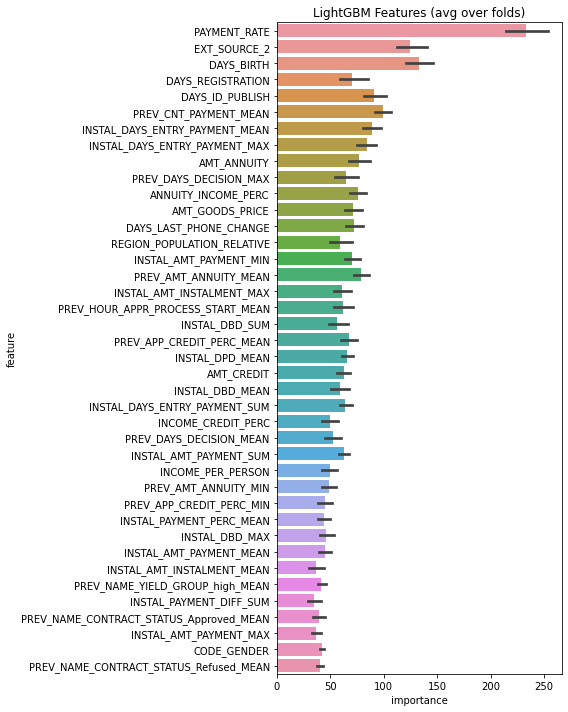

In [164]:
display_importances(feature_importance_df)

In [168]:
# for now y_pred is the probability that the value is 1
my_valids = [1 if i >= 0.45 else 0 for i in valid_preds_proba[:,1]]
    
my_valids = pd.Series(my_valids)

confusion_matrix(valid_y, my_valids)

array([[1480,  905],
       [ 588, 1791]])

In [203]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(train_df[feats])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [204]:
# Visualize a single prediction
# The shap plot shows features that contribute to pushing the output from the base value to the 
# actual predicted value
# Red colour pushes the predictions higher (towards positive)
# Blue colour indicates the predicitions lower (towards negative)
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], train_df[feats].iloc[0,:])

In [205]:
# Visualize a single prediction
shap.force_plot(explainer.expected_value[1], shap_values[1][10,:], train_df[feats].iloc[10,:])

In [206]:
# Visualize a single prediction
shap.force_plot(explainer.expected_value[1], shap_values[1][100,:], train_df[feats].iloc[100,:])

In [198]:
shap_values

[array([[ 0.0809857 , -0.0742577 , -0.03896319, ..., -0.09808995,
          0.01982958, -0.06815909],
        [ 0.04695657,  0.00639413,  0.02428204, ...,  0.02545929,
          0.00705516, -0.08529872],
        [ 0.03538161,  0.04221174,  0.04537158, ..., -0.1378743 ,
          0.01024545,  0.03490025],
        ...,
        [ 0.01510322, -0.09606074, -0.00597626, ...,  0.04130086,
          0.0080175 , -0.07653569],
        [ 0.02737912,  0.01910817,  0.00647842, ..., -0.06106226,
          0.00204984, -0.18731447],
        [ 0.03053025, -0.04810228, -0.0227501 , ...,  0.02225631,
          0.01131644,  0.07757127]]),
 array([[-0.0809857 ,  0.0742577 ,  0.03896319, ...,  0.09808995,
         -0.01982958,  0.06815909],
        [-0.04695657, -0.00639413, -0.02428204, ..., -0.02545929,
         -0.00705516,  0.08529872],
        [-0.03538161, -0.04221174, -0.04537158, ...,  0.1378743 ,
         -0.01024545, -0.03490025],
        ...,
        [-0.01510322,  0.09606074,  0.00597626, ..., -

In [196]:
explainer.expected_value

[0.018261432005752004, -0.018261432005752004]

In [199]:
# Visualize a single prediction
# 
shap.force_plot(explainer.expected_value[1], shap_values[1][3,:], train_df[feats].iloc[3,:])

In [189]:
# Visualize many predictions
#To keep the browser happy we only visualize 1,000 individuals.
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], train_df[feats].iloc[:1000,:])

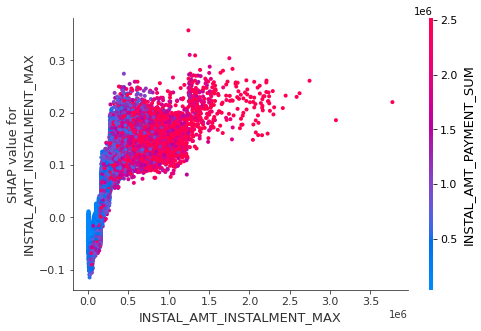

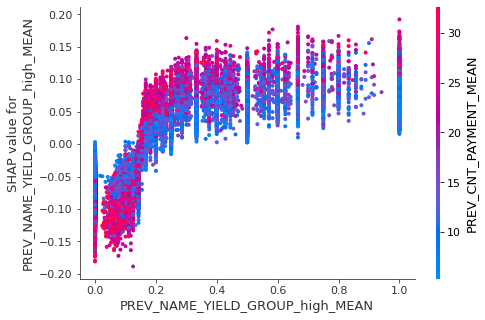

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


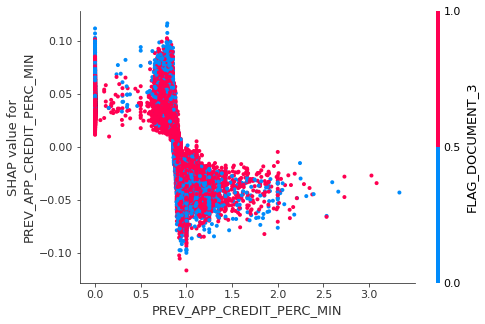

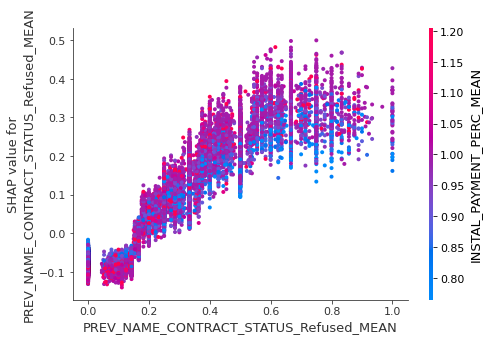

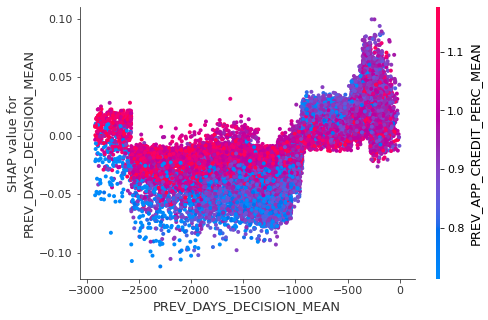

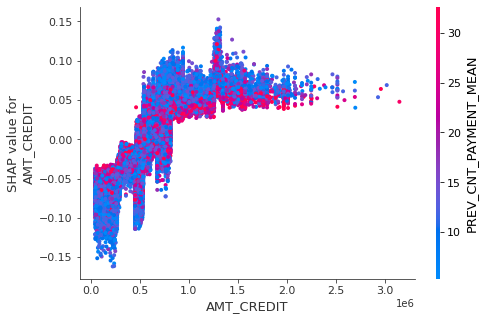

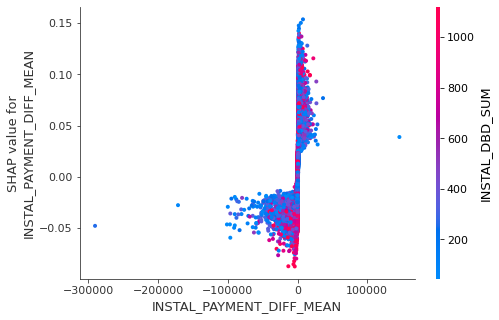

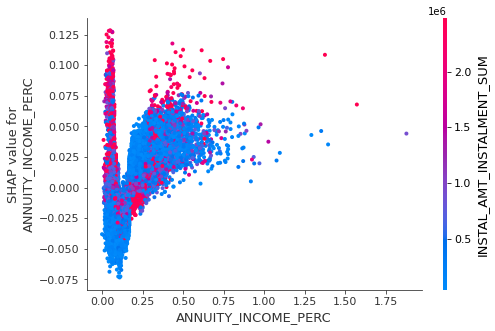

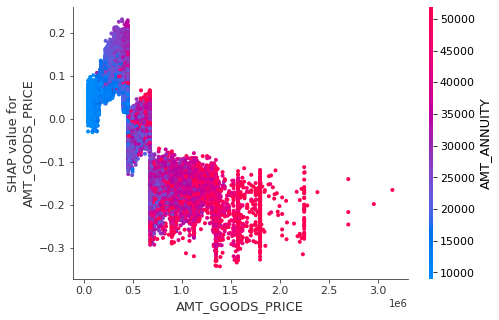

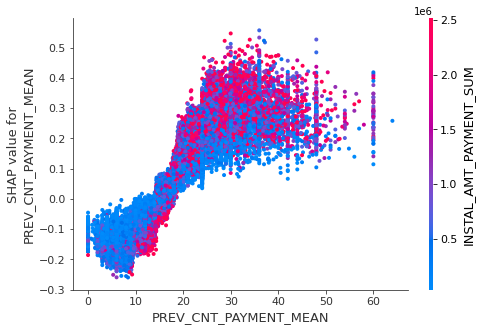

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


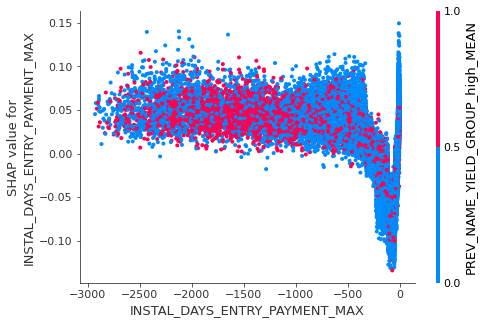

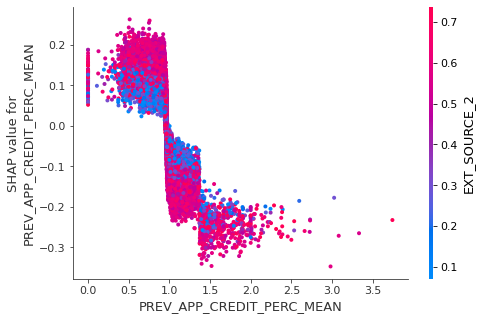

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


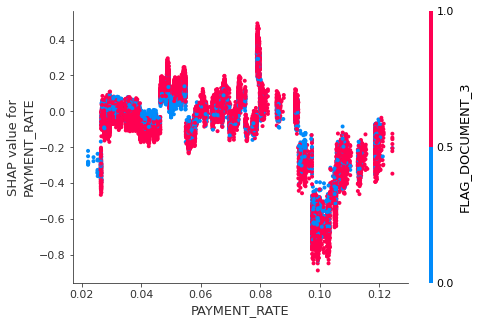

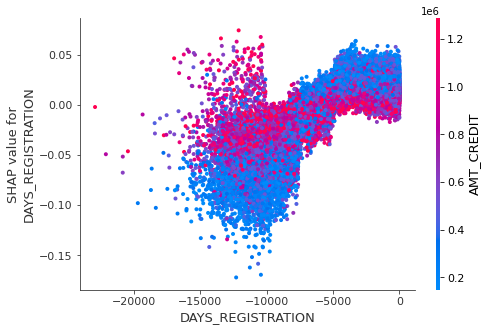

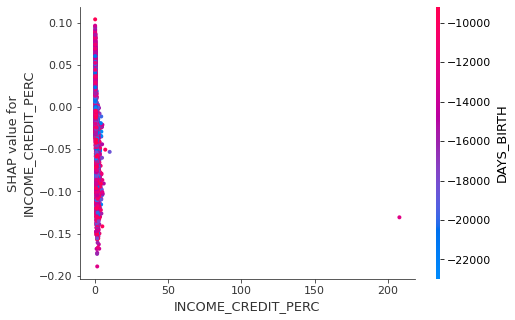

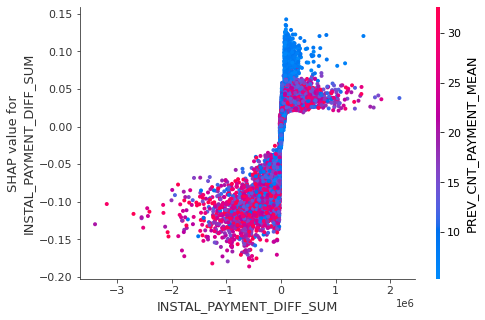

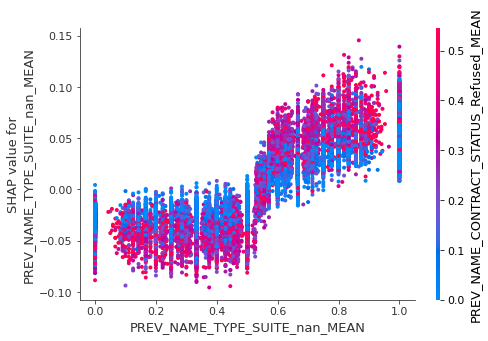

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


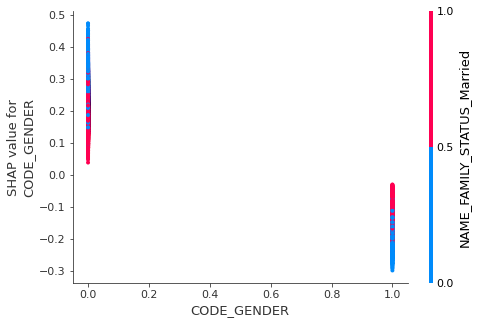

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


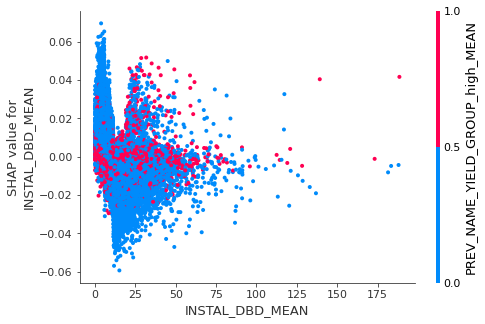

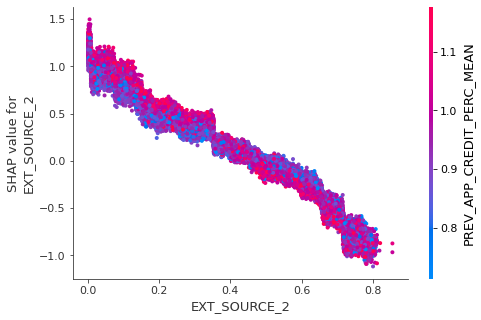

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


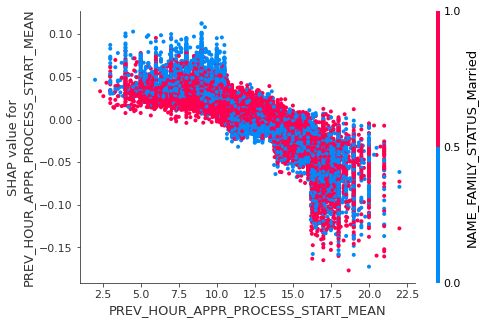

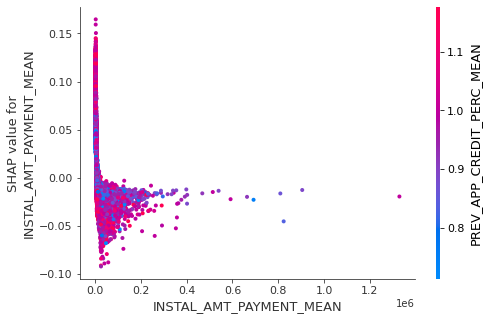

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


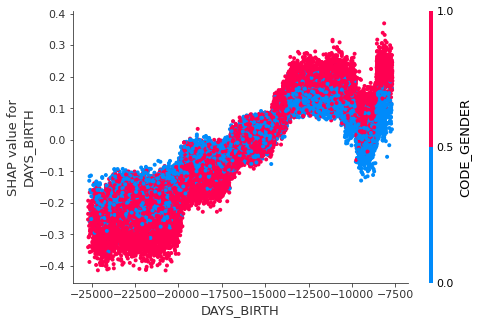

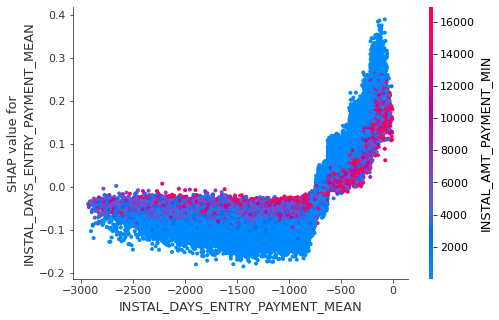

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


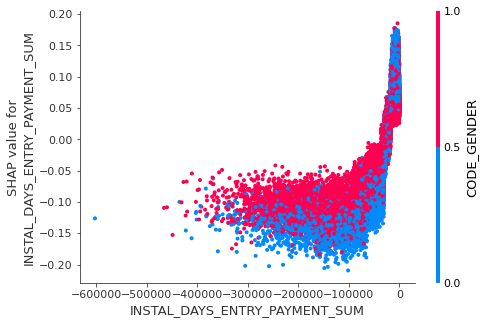

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


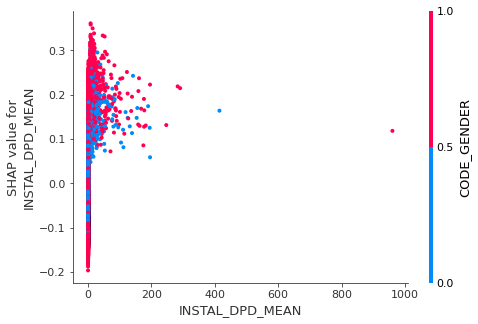

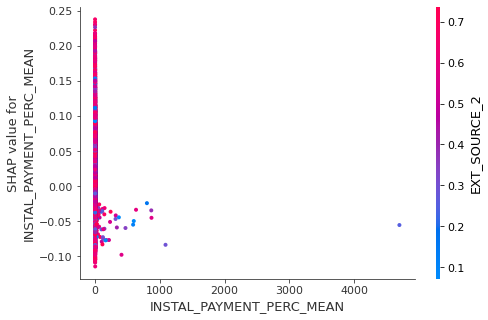

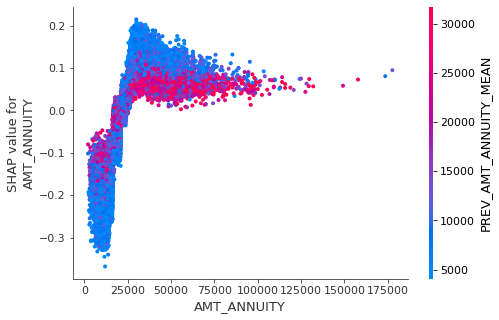

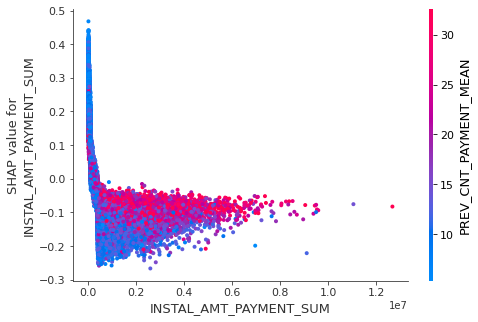

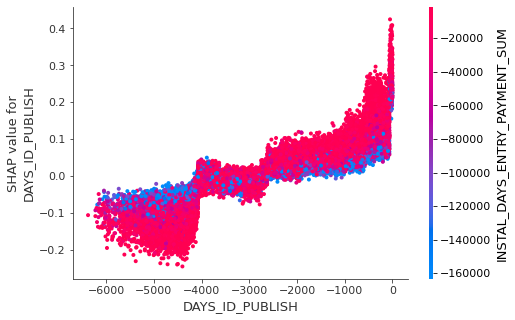

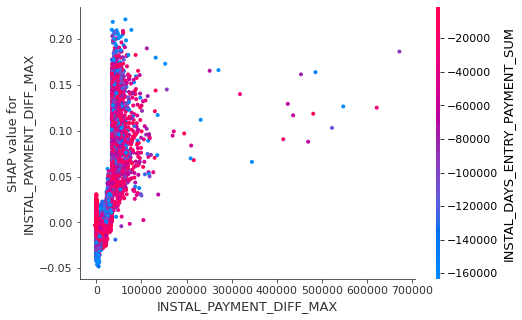

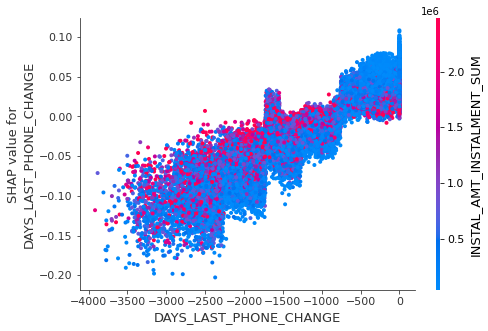

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


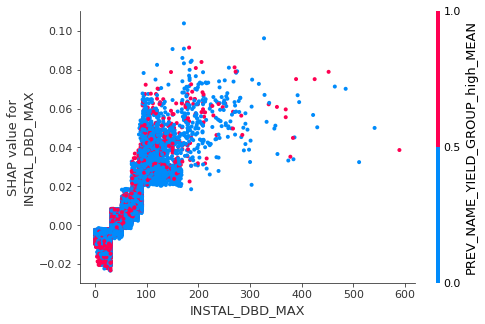

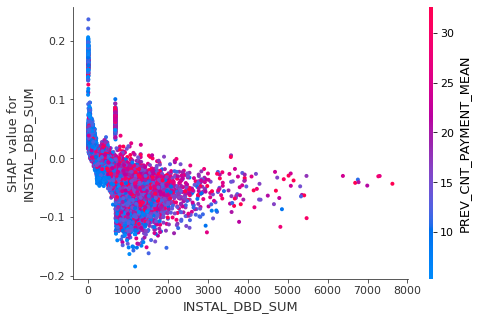

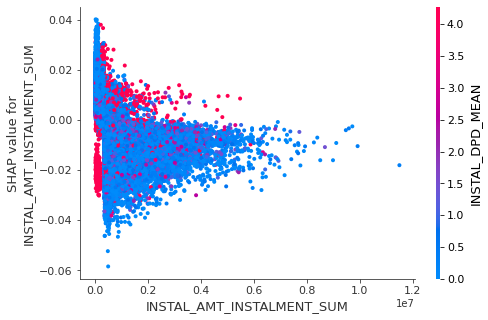

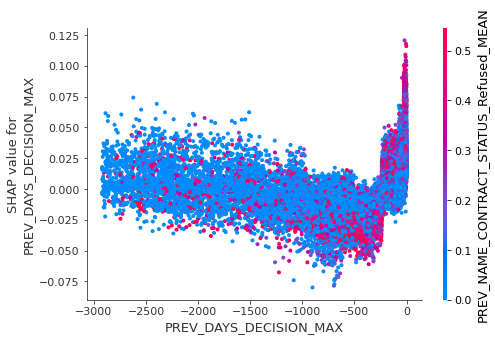

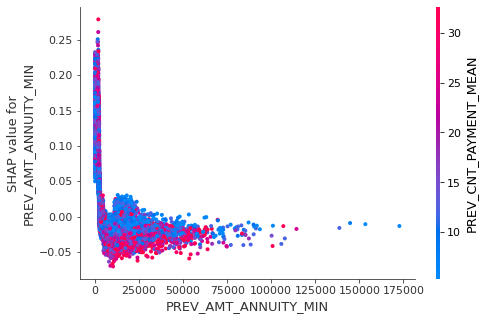

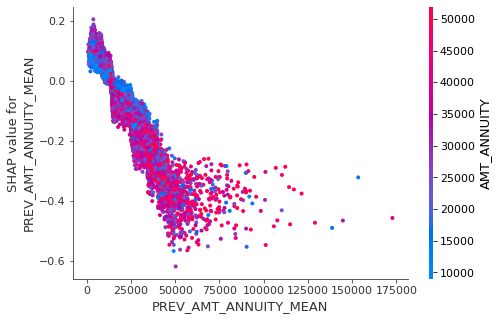

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


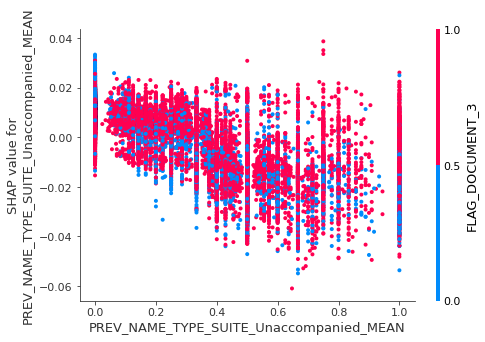

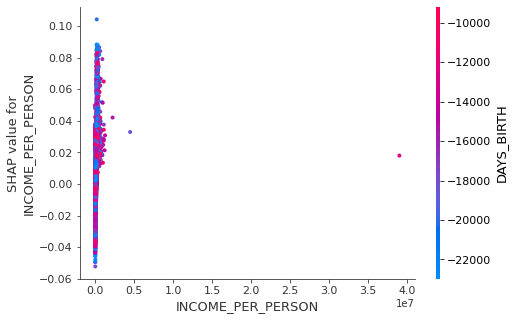

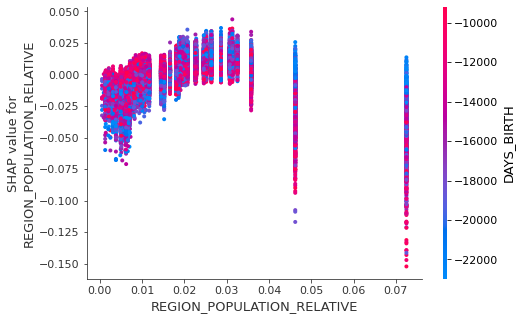

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


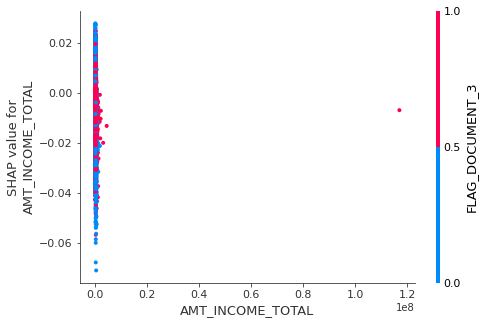

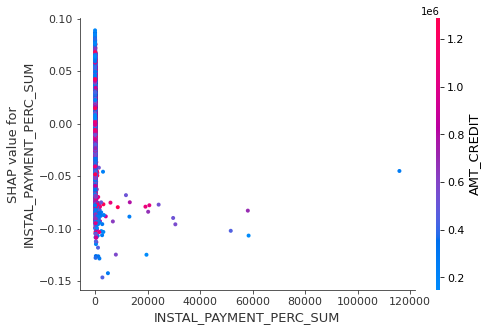

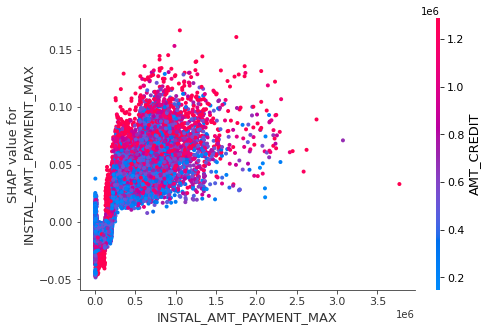

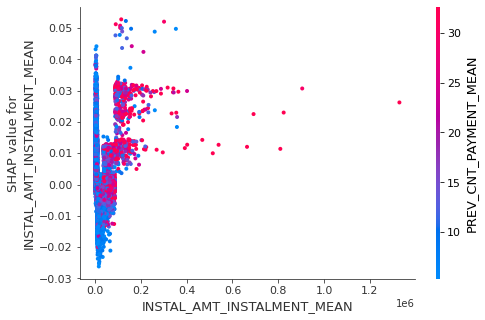

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


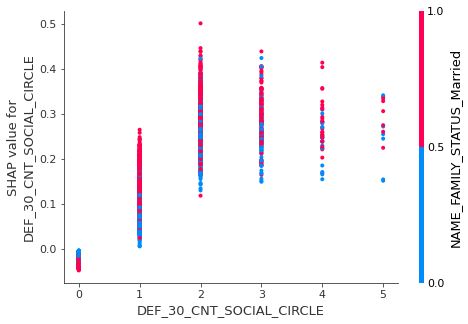

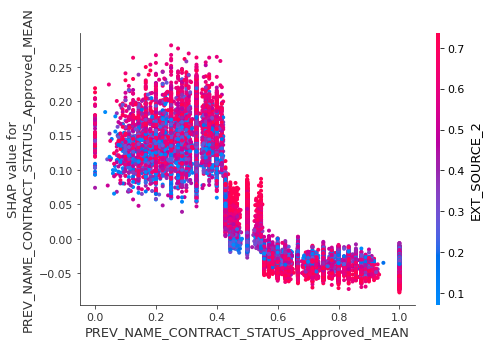

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


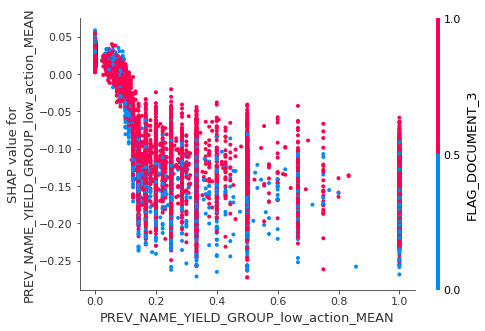

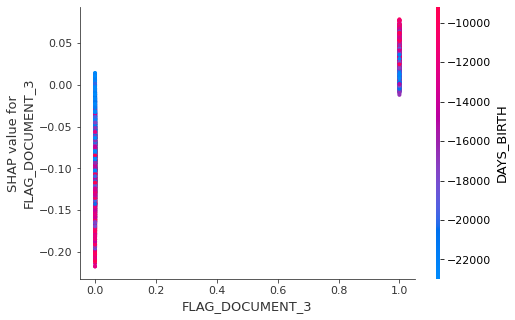

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


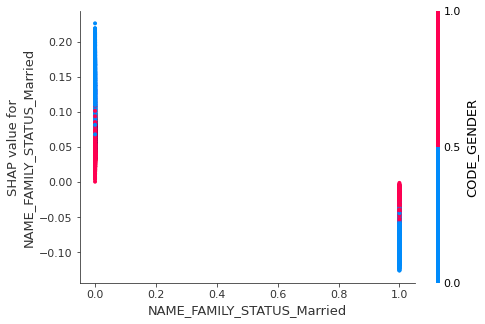

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


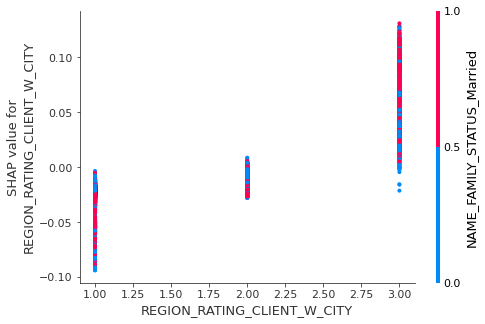

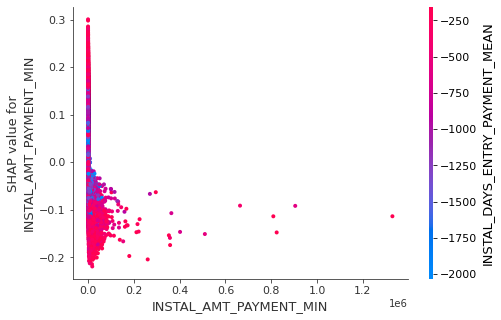

In [190]:
# single feature's effect on the model output
# we get a dot for every person
# plot a shap value of the feature vs the value of the feature for all instances in the dataset
# shows the change in prediction as the feature changes?
for name in train_x.columns:
    shap.dependence_plot(name, shap_values[1], train_df[feats], display_features = train_df[feats])

In [178]:

shap_values = shap.TreeExplainer(model).shap_values(train_x)
len(shap_values)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


2

In [179]:
shap_values

[array([[ 0.0809857 , -0.0742577 , -0.03896319, ..., -0.09808995,
          0.01982958, -0.06815909],
        [ 0.04695657,  0.00639413,  0.02428204, ...,  0.02545929,
          0.00705516, -0.08529872],
        [ 0.03538161,  0.04221174,  0.04537158, ..., -0.1378743 ,
          0.01024545,  0.03490025],
        ...,
        [ 0.01510322, -0.09606074, -0.00597626, ...,  0.04130086,
          0.0080175 , -0.07653569],
        [ 0.02737912,  0.01910817,  0.00647842, ..., -0.06106226,
          0.00204984, -0.18731447],
        [ 0.03053025, -0.04810228, -0.0227501 , ...,  0.02225631,
          0.01131644,  0.07757127]]),
 array([[-0.0809857 ,  0.0742577 ,  0.03896319, ...,  0.09808995,
         -0.01982958,  0.06815909],
        [-0.04695657, -0.00639413, -0.02428204, ..., -0.02545929,
         -0.00705516,  0.08529872],
        [-0.03538161, -0.04221174, -0.04537158, ...,  0.1378743 ,
         -0.01024545, -0.03490025],
        ...,
        [-0.01510322,  0.09606074,  0.00597626, ..., -

In [184]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values, max_display= 20)

AttributeError: 'list' object has no attribute 'base_values'

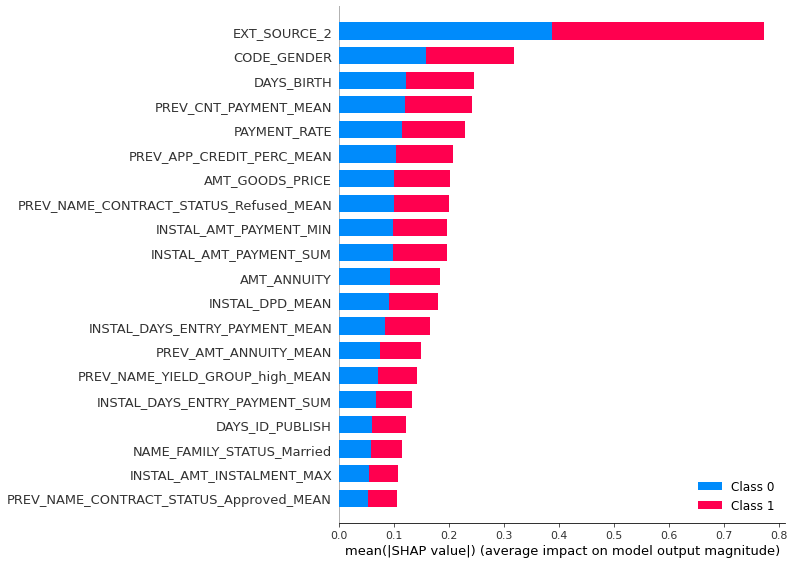

In [183]:
shap.summary_plot(shap_values, train_x)
                  #plot_type="bar")

In [175]:
# equilibrated case
background = train_x.sample(1000) #X is equilibrated 
background

INSTAL_AMT_INSTALMENT_MAX  PREV_NAME_YIELD_GROUP_high_MEAN  \
87404                   32193.225                            0.750   
143071                  52914.060                            0.000   
177667                  49711.545                            0.000   
277858                   9775.890                            0.000   
148745                 211500.000                            0.125   
...                           ...                              ...   
298009                  40120.155                            0.250   
178883                   4723.695                            0.000   
201555                 106933.500                            0.000   
54608                  213929.685                            0.500   
11724                  693616.230                            0.000   

        PREV_APP_CREDIT_PERC_MIN  PREV_NAME_CONTRACT_STATUS_Refused_MEAN  \
87404                   0.859328                                   0.750   
143071                  0.834701                                   0.000   
177667                  0.804635                                   0.750   
277858                  0.791139                                   0.000   
148745                  0.000000                                   0.125   
...                          ...                                     ...   
298009                  0.834725                                   0.375   
178883                  1.000000                                   0.000   
201555                  1.000000                                   0.000   
54608                   0.822053                                   0.000   
11724                   0.825636                                   0.000   

        PREV_DAYS_DECISION_MEAN  AMT_CREDIT  INSTAL_PAYMENT_DIFF_MEAN  \
87404               -946.250000    746280.0               4599.032143   
143071              -288.428571    903289.5                 83.645526   
177667              -627.500000    355536.0               1308.024000   
277858              -514.000000    501435.0                116.363415   
148745              -802.125000    544068.0                104.406353   
...                         ...         ...                       ...   
298009              -298.625000    382500.0                818.194091   
178883              -360.000000    781920.0                  0.000000   
201555              -590.500000    761872.5                637.787812   
54608               -559.500000    526491.0                  0.000000   
11724               -560.500000    886176.0             -23544.642857   

        ANNUITY_INCOME_PERC  AMT_GOODS_PRICE  PREV_CNT_PAYMENT_MEAN  ...  \
87404              0.301700         675000.0               4.500000  ...   
143071             0.371681         837000.0              18.000000  ...   
177667             0.153200         270000.0              44.571429  ...   
277858             0.201550         414000.0              21.000000  ...   
148745             0.098483         382500.0               8.500000  ...   
...                     ...              ...                    ...  ...   
298009             0.138767         382500.0              12.000000  ...   
178883             0.310164         675000.0              16.000000  ...   
201555             0.194463         675000.0              11.000000  ...   
54608              0.182696         454500.0               6.000000  ...   
11724              0.137813         765000.0              17.500000  ...   

        INSTAL_PAYMENT_PERC_SUM  INSTAL_AMT_PAYMENT_MAX  \
87404                  6.000000               32193.225   
143071                37.000000               52914.060   
177667                22.000000               49711.545   
277858                43.984618                9775.890   
148745                84.000000              211500.000   
...                         ...                     ...   
298009                10.000000               40120

In [185]:
# background used in explainer defines base value
explainer = shap.TreeExplainer(model, background, model_output="raw")
explainer

In [186]:
shap_values = explainer.shap_values(train_x)
shap_values

100%|===================| 42831/42885 [01:38<00:00]        

Exception: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was -1.053387, while the model output was -0.956005. If this difference is acceptable you can set check_additivity=False to disable this check.

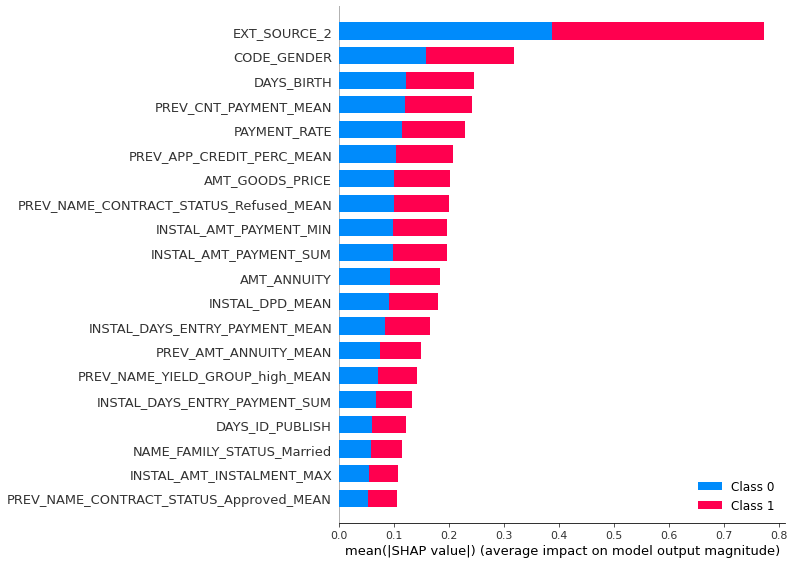

In [180]:
# background used in the plot, the points that are visible on the plot
shap.summary_plot(shap_values, background, feature_names = background.columns)

In [182]:
import plotly.io as pio
pio.templates.default = "plotly_white"
from plotly.subplots import make_subplots
import pandas as pd
import plotly.express as px

import matplotlib.pylab as pl
import numpy as np



def dependence_plot_classes(feature_name,X_background_display, y_background, shap_values) :
    """
    Create a plot showing relationship between a feature and the shapley values for this feature, colored by the class value.
        Parameters
        ----------
        feature_name : str or int
            Indicate name of the column or the index
        X_background_display : pandas.DataFrame 
            Data frame of feature values (# samples x # features) with non tranformed features values of preference
        y_background : list or np.array
            the classes - can be real or predicted
            
        shap_values : np.array
            shapley values matrx
            
    """
    if isinstance(feature_name, str):
        i = X_background_display.columns.get_loc(feature_name)
    else : 
        i = feature_name
    assert(i not in X_background_display.columns), "Column name not in data frame columns"
    
    a = shap_values[:,i]
    b = X_background_display.iloc[:,i].values
    res = y_background.astype(int).astype(str)

    assert len(a) == len(b)
    y_name = "Shapley values for "+ X_background_display.columns[i]
    x_name = X_background_display.columns[i]
    df = pd.DataFrame({y_name:a,x_name:b,"y_label": res})
    fig = px.scatter(df,  x=x_name, y=y_name, color="y_label", marginal_y="histogram", marginal_x="histogram",width=500, height=500,opacity=0.5)

    fig.show()

In [ ]:
dependence_plot_classes(feature_name,X_background_display, y_background, shap_values)

In [104]:
from sklearn.metrics import confusion_matrix
conf_lgm = confusion_matrix(valid_y, valid_preds)
conf_lgm

array([[1744,  748],
       [ 824, 1548]])

In [76]:
from sklearn.metrics import confusion_matrix
conf_lgm = confusion_matrix(valid_y, valid_preds)
conf_lgm

array([[2297,  700],
       [ 974, 1393]])

In [46]:
from sklearn.metrics import confusion_matrix
conf_lgm = confusion_matrix(valid_y, valid_preds)
conf_lgm

array([[3324,  666],
       [1228, 1146]])

# Results Undersampling df Version Thresh 0.5 
Best  -0.655 params {'learning_rate': 0.0690711273391379, 'max_depth': 8.0, 'min_child_weight': 25.0, 'min_data_in_leaf': 14.0, 'min_split_gain': 0.24462483497006832, 'num_leaves': 34.0, 'reg_alpha': 0.06897477282989405, 'reg_lambda': 0.028628472180409287, 'subsample': 0.9984636029180414}


In [238]:
from sklearn.metrics import confusion_matrix
conf_lgm = confusion_matrix(valid_y, valid_preds)
conf_lgm

array([[1622,  731],
       [ 750, 1626]])

In [240]:
tn, fp, fn, tp = confusion_matrix(valid_y, valid_preds).ravel()

tn_weight = 1
fp_weight = 0
fn_weight = -10
tp_weight = 0
# gain function for company, true positives and false positives don't matter that much to us
# we want to penalise the false negatives, and we want to say yes to true negatives
gain = tp*(tp_weight) + tn*(tn_weight) + fp*(fp_weight) + fn*(fn_weight)

# best represents scenario where there are no false negatives or false postives
# so all false positives would be correctly shown as negative
# and all false negatives would be correctly show as positive
best = (tn + fp) * tn_weight + (tp + fn) * tp_weight

# baseline is a naive model that predicts non default(negative) for everyone
# but all true positives and false negatives would be incorrectly shown as negative
baseline = (tn + fp) * tn_weight + (tp + fn) * fn_weight

score = (gain - baseline) / (best - baseline)

score

0.6535774410774411

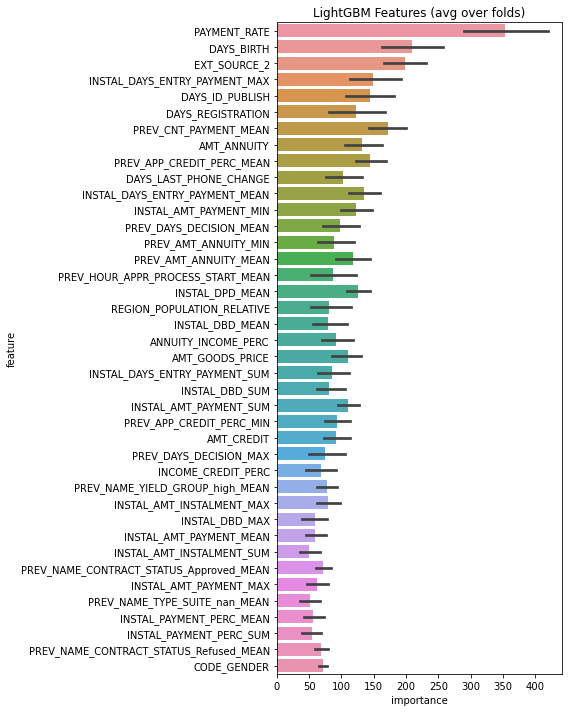

In [241]:
display_importances(feature_importance_df)

In [263]:
# for now y_pred is the probability that the value is 1
my_valids = [1 if i >= 0.44 else 0 for i in valid_preds_proba[:,1]]
    
my_valids = pd.Series(my_valids)

confusion_matrix(valid_y, my_valids)

array([[1395,  958],
       [ 570, 1806]])

In [264]:
tn, fp, fn, tp = confusion_matrix(valid_y, my_valids).ravel()

tn_weight = 1
fp_weight = 0
fn_weight = -10
tp_weight = 0
# gain function for company, true positives and false positives don't matter that much to us
# we want to penalise the false negatives, and we want to say yes to true negatives
gain = tp*(tp_weight) + tn*(tn_weight) + fp*(fp_weight) + fn*(fn_weight)

# best represents scenario where there are no false negatives or false postives
# so all false positives would be correctly shown as negative
# and all false negatives would be correctly show as positive
best = (tn + fp) * tn_weight + (tp + fn) * tp_weight

# baseline is a naive model that predicts non default(negative) for everyone
# but all true positives and false negatives would be incorrectly shown as negative
baseline = (tn + fp) * tn_weight + (tp + fn) * fn_weight

score = (gain - baseline) / (best - baseline)

score

0.7197811447811447

In [274]:
import shap
shap.initjs()

shap_explainer = shap.TreeExplainer(model)
shap_values = shap_explainer.shap_values(train_df[feats])
#len(shap_values)
shap.force_plot(shap_explainer.expected_value, shap_values[1, :], test_1)

TypeError: list indices must be integers or slices, not tuple

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


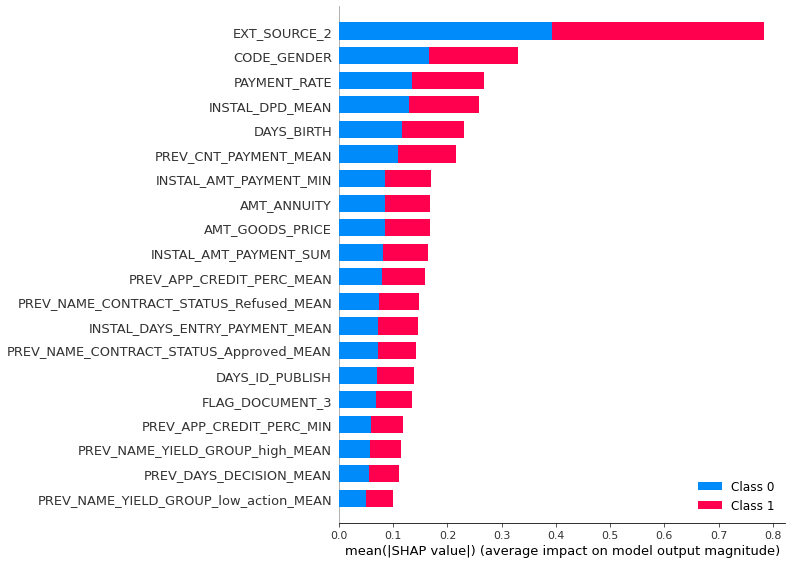

In [265]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(train_x)
shap.summary_plot(shap_values, train_x, plot_type="bar")

In [267]:
test_1 = valid_x.iloc[1]

In [268]:
import lime 
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data =np.array(train_x),
    feature_names = train_x.columns,
    class_names=['bad', 'good'],
    mode='classification'
)


lime_exp = lime_explainer.explain_instance(
    data_row = test_1,
    predict_fn=model.predict_proba
)
lime_exp.show_in_notebook(show_table=True)


In [269]:
lime_exp.predict_proba

array([0.70899721, 0.29100279])

# Results No Missing Values df Version Thresh 0.5 
Scoring with new weights


In [165]:
from sklearn.metrics import confusion_matrix
conf_lgm = confusion_matrix(valid_y, valid_preds)
conf_lgm

array([[26305,   127],
       [ 2312,    84]])

In [169]:
tn, fp, fn, tp = confusion_matrix(valid_y, valid_y).ravel()

tn_weight = 1
fp_weight = 0
fn_weight = -10
tp_weight = 0
# gain function for company, true positives and false positives don't matter that much to us
# we want to penalise the false negatives, and we want to say yes to true negatives
gain = tp*(tp_weight) + tn*(tn_weight) + fp*(fp_weight) + fn*(fn_weight)

# best represents scenario where there are no false negatives or false postives
# so all false positives would be correctly shown as negative
# and all false negatives would be correctly show as positive
best = (tn + fp) * tn_weight + (tp + fn) * tp_weight

# baseline is a naive model that predicts non default(negative) for everyone
# but all true positives and false negatives would be incorrectly shown as negative
baseline = (tn + fp) * tn_weight + (tp + fn) * fn_weight

score = (gain - baseline) / (best - baseline)

score

1.0

# Results No Missing df Version Thresh 0.5 
Best  -0.056 params {'learning_rate': 0.9984658441853237, 'max_depth': 7.0, 'min_data_in_leaf': 5.0, 'min_split_gain': 0.14359362198531114, 'num_leaves': 37.0, 'reg_alpha': 0.03057280931587678, 'reg_lambda': 0.18296876279006813, 'subsample': 0.18971990503932706}

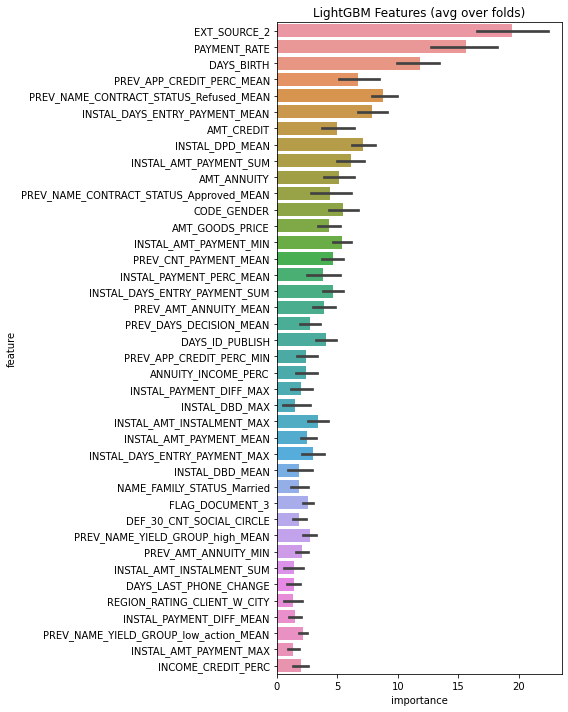

In [133]:
display_importances(feature_importance_df)

In [134]:
from sklearn.metrics import confusion_matrix
conf_lgm = confusion_matrix(valid_y, valid_preds)
conf_lgm

array([[26250,   182],
       [ 2300,    96]])

In [138]:
tn, fp, fn, tp = confusion_matrix(valid_y, valid_preds).ravel()

tn_weight = 1
fp_weight = 0
fn_weight = -10
tp_weight = 0
# gain function for company, true positives and false positives don't matter that much to us
# we want to penalise the false negatives, and we want to say yes to true negatives
gain = tp*(tp_weight) + tn*(tn_weight) + fp*(fp_weight) + fn*(fn_weight)

# best represents scenario where there are no false negatives or false postives
# so all false positives would be correctly shown as negative
# and all false negatives would be correctly show as positive
best = (tn + fp) * tn_weight + (tp + fn) * tp_weight

# baseline is a naive model that predicts non default(negative) for everyone
# but all true positives and false negatives would be incorrectly shown as negative
baseline = (tn + fp) * tn_weight + (tp + fn) * fn_weight

score = (gain - baseline) / (best - baseline)

score

0.03247078464106845

In [135]:
# for now y_pred is the probability that the value is 1
my_valids = [1 if i >= 0.4 else 0 for i in valid_preds_proba[:,1]]
    
my_valids = pd.Series(my_valids)

confusion_matrix(valid_y, my_valids)

array([[26039,   393],
       [ 2225,   171]])

In [136]:
tn, fp, fn, tp = confusion_matrix(valid_y, my_valids).ravel()

tn_weight = 1
fp_weight = 0
fn_weight = -10
tp_weight = 0
# gain function for company, true positives and false positives don't matter that much to us
# we want to penalise the false negatives, and we want to say yes to true negatives
gain = tp*(tp_weight) + tn*(tn_weight) + fp*(fp_weight) + fn*(fn_weight)

# best represents scenario where there are no false negatives or false postives
# so all false positives would be correctly shown as negative
# and all false negatives would be correctly show as positive
best = (tn + fp) * tn_weight + (tp + fn) * tp_weight

# baseline is a naive model that predicts non default(negative) for everyone
# but all true positives and false negatives would be incorrectly shown as negative
baseline = (tn + fp) * tn_weight + (tp + fn) * fn_weight

score = (gain - baseline) / (best - baseline)

score

0.05496661101836394

# Results SMOTE df Version Thresh 0.5 
Best  -0.913 params {'learning_rate': 0.5379983216330518, 'max_depth': 8.0, 'min_data_in_leaf': 10.0, 'min_split_gain': 0.5111350465018228, 'num_leaves': 36.0, 'reg_alpha': 0.022166934271907825, 'reg_lambda': 0.09803381099417433, 'subsample': 0.08879622311479493}

In [109]:
feature_importance_df

feature  importance  fold
0                INSTAL_AMT_INSTALMENT_MAX          16     1
1          PREV_NAME_YIELD_GROUP_high_MEAN         105     1
2                 PREV_APP_CREDIT_PERC_MIN          59     1
3   PREV_NAME_CONTRACT_STATUS_Refused_MEAN          66     1
4                  PREV_DAYS_DECISION_MEAN          39     1
..                                     ...         ...   ...
47   PREV_NAME_YIELD_GROUP_low_action_MEAN          42    10
48                         FLAG_DOCUMENT_3          13    10
49              NAME_FAMILY_STATUS_Married           7    10
50             REGION_RATING_CLIENT_W_CITY          17    10
51                  INSTAL_AMT_PAYMENT_MIN          42    10

[572 rows x 3 columns]

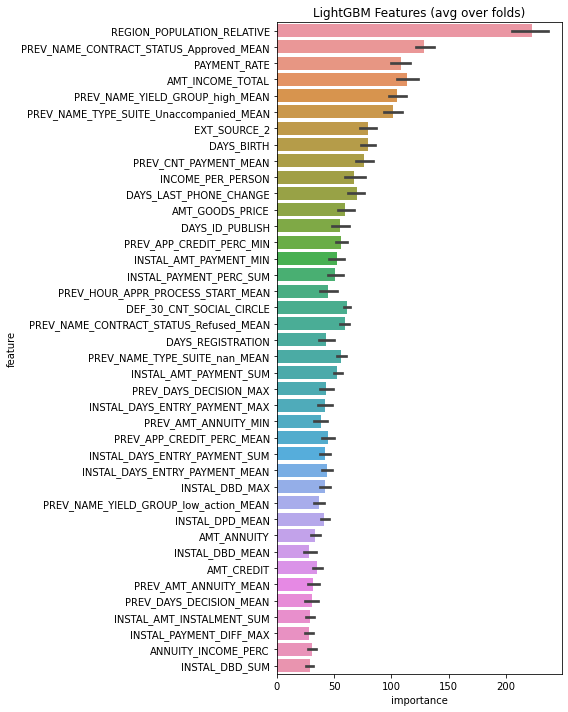

In [110]:
display_importances(feature_importance_df)

In [111]:
from sklearn.metrics import confusion_matrix
conf_lgm = confusion_matrix(valid_y, valid_preds)
conf_lgm

array([[27734,   525],
       [ 2379, 25895]])

In [115]:
# for now y_pred is the probability that the value is 1
my_valids = [1 if i >= 0.4 else 0 for i in valid_preds_proba[:,1]]
    
my_valids = pd.Series(my_valids)

confusion_matrix(valid_y, my_valids)

array([[27329,   930],
       [ 2196, 26078]])